**Q6. Write a python program to implement the simple expert system.**

An expert system is AI software that uses knowledge stored in a knowledge base to solve problems that would usually require a human expert thus preserving a human expert’s knowledge in its knowledge base. They can advise users as well as provide explanations to them about how they reached a particular conclusion or advice. Knowledge Engineering is the term used to define the process of building an Expert System and its practitioners are called Knowledge Engineers. The primary role of a knowledge engineer is to make sure that the computer possesses all the knowledge required to solve a problem. The knowledge engineer must choose one or more forms in which to represent the required knowledge as a symbolic pattern in the memory of the computer.

**Components of an Expert System:-**
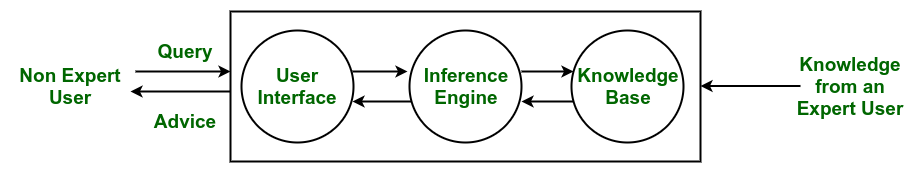
The Inference Engine generally uses two strategies for acquiring knowledge from the Knowledge Base, namely – 

Forward Chaining
Backward Chaining

In [19]:


import copy

def parse(path):
    parameters = {}
    rules = []
    try:
        with open(path,'r') as f:
            lines = f.readlines()        
    except:
        print ("Problem pri parsiranju datoteke " )+ path
        return
    
    for line in lines:
        if not line or line.startswith('-') or line.startswith('#'):
            continue
        elif line.startswith('IF'):
            current = {}
            sides = line.replace('IF','').split('THEN')
            current['LHS'] = {}
            
            conditions = sides[0].split('&')
            for condition in conditions:
                HS = map(str.strip, condition.split('=',1))
                current['LHS'][HS[0]] = [s.strip() for s in HS[1].split('|')]
                
            action = sides[1]
            HS = map(str.strip, action.split('='))
            current['RHS'] = {HS[0]:HS[1]}
            rules.append(copy.deepcopy(current))
        else:
            splitLine = line.split('=',1)
            parameters[splitLine[0].strip()] = [s.strip() for s in splitLine[1].split('|')]    
            
    return parameters, rules
     
        
    